# 다양한 분류 모형
SVM, 결정트리, Random Forest, Gradient Boosting

### 1. 데이터 준비 - Breast Cancer Wisconsin (Diagnostic) Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR) #boston['DESCR'] 도 가능
print(cancer.data.shape, cancer.target.shape)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


### 2. 데이터 살펴보기

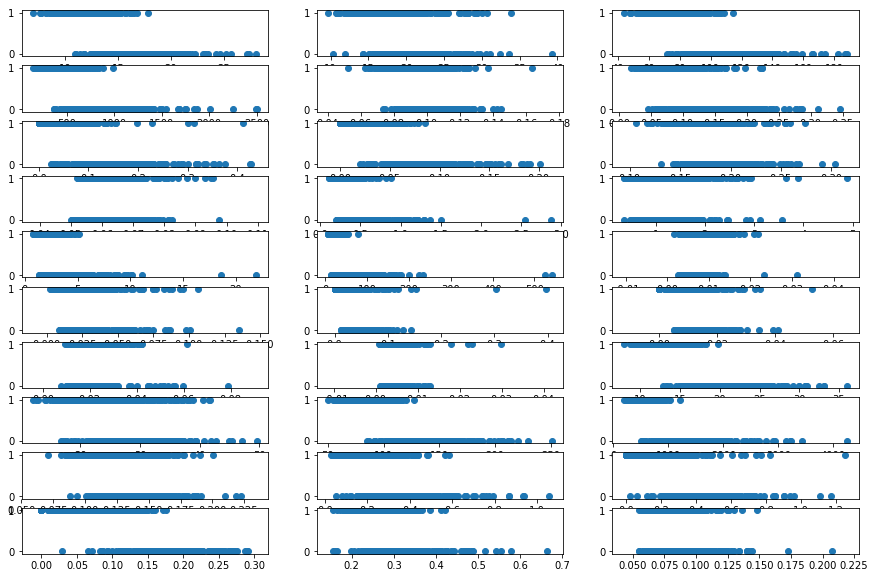

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 3, figsize=(15, 10)) #총 30개의 독립변수가 있으므로 10x3 타일을 이용
#y = iris.target
y = cancer.target.astype('str') # target data의 type을 string으로 변환

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < cancer.data.shape[1]:
        x = cancer.data[:,i]
#        ax.set_title(cancer.feature_names[i])
        ax.scatter(x, y)
plt.show()

#### histogram을 이용해 시각화 향상
위 그래프는 각 점의 정확한 빈도가 잘 보이지 않으므로 판단이 어려움<br>
즉 특정 위치에 더 많은 점이 찍혀있을 수 있으므로 다른 방법이 필요<br>

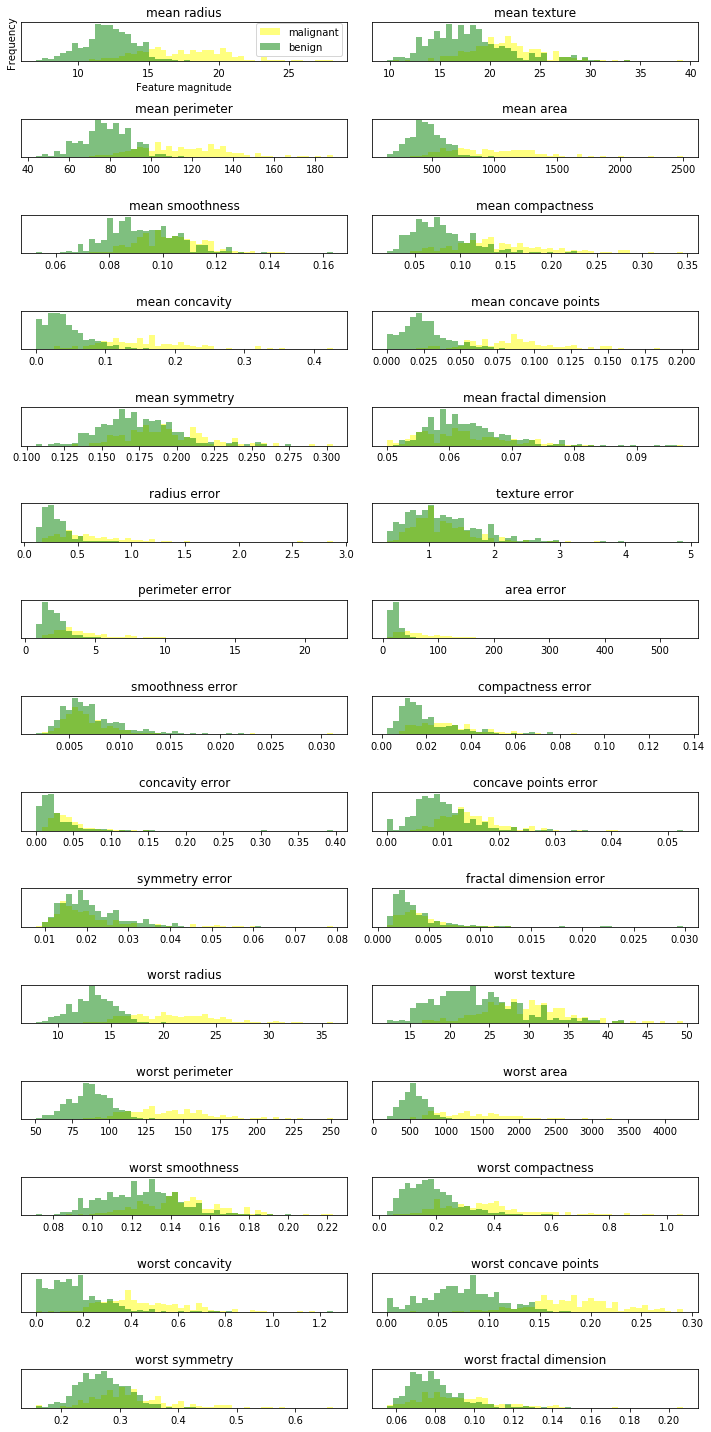

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10, 20)) #총 30개의 독립변수가 있으므로 10x3 타일을 이용

malignant = cancer.data[cancer.target == 0] # malignant를 분리
benign = cancer.data[cancer.target == 1] # benign을 분리

ax = axes.ravel()
colors = ['yellow', 'green']

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=colors[0], alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=colors[1], alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

#### seaborn package
seaborn package는 pairplot을 이용해 한 변수의 kde, 두 변수 간의 2차원 scatter graph를 쉽게 볼 수 있음 

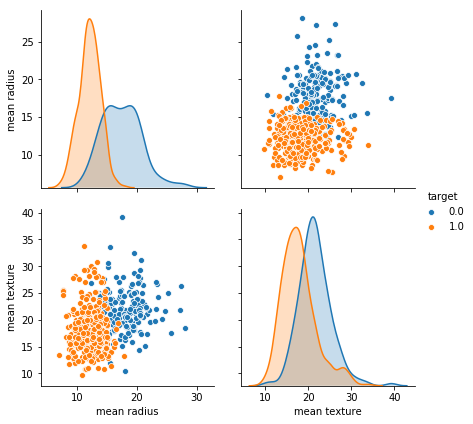

In [5]:
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

g = sns.pairplot(df, height=3, hue='target', vars=['mean radius', 'mean texture'])

한 변수의 kde를 직접 그리고 싶다면 아래 코드를 이용

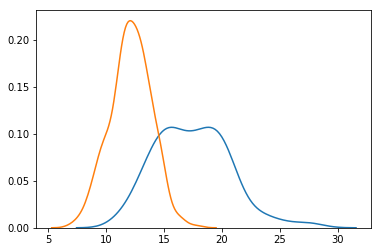

In [6]:
import numpy as np
import seaborn as sns
#sns.set_style('whitegrid')
g = sns.kdeplot(np.array(cancer.data[cancer.target == 0, 0]))
g = sns.kdeplot(np.array(cancer.data[cancer.target == 1, 0]))

### 3. k-최근접 이웃
가장 단순한 분류 방법<br>
가장 가까운 훈련 데이터 포인트 k개를 찾아 평균을 계산하여 예측에 사용

직관적으로 봤을 때 아래 그림에서 Test 점은 어디에 속할까?<br>
그렇게 생각한 이유는 무엇인가? -> 주변에 Benign이 많기 때문에 <br>
어떻게 구현할 수 있을까? -> 가까운 점들을 기반으로 판단

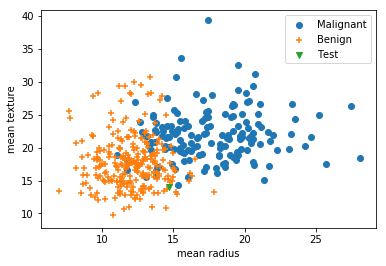

In [7]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='+')
plt.scatter(X_test[0, 0], X_test[0, 1], marker='v')

plt.legend(['Malignant', 'Benign', 'Test'])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('K-neighbor train set score: {:.3f}'.format(knn.score(X_train, y_train)))
print('K-neighbor test set score: {:.3f}'.format(knn.score(X_test, y_test)))

K-neighbor train set score: 0.946
K-neighbor test set score: 0.923


**n_neighbors** : 사용할 이웃의 수, 커질수록 훈련 데이터에 대한 예측은 좋아짐<br>
훈련과 관계없이 테스트 세트의 정확도는 너무 작거나 너무 크면 좋지 않은 경향이 있어, 적절하게 선택해야 함

In [9]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print('K-neighbor train set score: {:.3f}'.format(knn.score(X_train, y_train)))
print('K-neighbor test set score: {:.3f}'.format(knn.score(X_test, y_test)))

K-neighbor train set score: 0.932
K-neighbor test set score: 0.930


**KNN 장단점** : 이해가 쉽고 별다른 노력 없이 좋은 성능을 보이는 경우가 있음<br>
훈련 세트가 커지면 예측이 느려지고 특성이 많은 경우에는 잘 동작하지 않음<br>
희소한(많은 특성이 0인) 데이터에서는 특히 성능이 낮음

### 4. 결정트리(Decision Tree)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    
https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC

결정 트리(decision tree)는 의사 결정 규칙과 그 결과들을 트리 구조로 도식화한 의사 결정 지원 도구의 일종이다. 결정 트리는 운용 과학, 그 중에서도 의사 결정 분석에서 목표에 가장 가까운 결과를 낼 수 있는 전략을 찾기 위해 주로 사용된다.

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train, y_train)
print('Decision Tree train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Decision Tree test set score: {:.3f}'.format(tree.score(X_test, y_test)))

Decision Tree train set score: 1.000
Decision Tree test set score: 0.944


In [11]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'],
               impurity=False, filled=True)

#### Graphviz 설치방법

1. 윈도우용 graphviz 패키지 설치

https://graphviz.gitlab.io/download/

Stable 2.38 Windows install packages

2. 환경변수에 Path 추가

C:\Program Files (x86)\Graphviz2.38\bin

cmd 창에서 SET 을 치고 Path의 내용 확인, 없으면 재부팅

3. conda 명령어를 이용해 python graphviz 모듈 설치

conda install -c anaconda graphviz

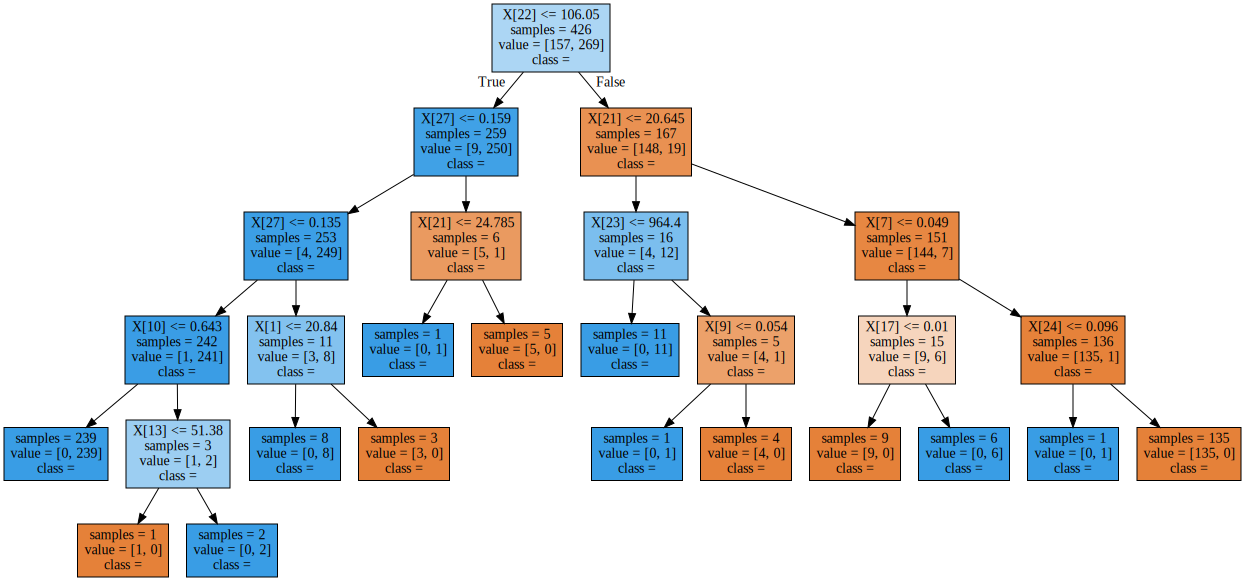

In [12]:
import graphviz

with open('tree.dot', encoding='utf8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 트리의 특성 중요도: 각 특성이 분류에 기여한 정도
feature_importances_, 이 값이 0이면 분류에서 사용되지 않았다는 뜻이나, 다른 특성과 겹쳐서 그럴 수도 있으므로 특성이 의미 없다는 것을 나타내지는 않는다

In [13]:
import numpy as np
np.set_printoptions(precision=3) #값이 소수점 이하 둘째자리까지만 나오도록 세팅

print('특성 중요도: \n{}\n'.format(tree.feature_importances_))

for feature, value in zip(cancer.feature_names, tree.feature_importances_):
    print('%s: %.3f' % (feature, value))

특성 중요도: 
[0.    0.022 0.    0.    0.    0.    0.    0.021 0.    0.008 0.003 0.
 0.    0.007 0.    0.    0.    0.036 0.    0.    0.    0.081 0.743 0.022
 0.01  0.    0.    0.047 0.    0.   ]

mean radius: 0.000
mean texture: 0.022
mean perimeter: 0.000
mean area: 0.000
mean smoothness: 0.000
mean compactness: 0.000
mean concavity: 0.000
mean concave points: 0.021
mean symmetry: 0.000
mean fractal dimension: 0.008
radius error: 0.003
texture error: 0.000
perimeter error: 0.000
area error: 0.007
smoothness error: 0.000
compactness error: 0.000
concavity error: 0.000
concave points error: 0.036
symmetry error: 0.000
fractal dimension error: 0.000
worst radius: 0.000
worst texture: 0.081
worst perimeter: 0.743
worst area: 0.022
worst smoothness: 0.010
worst compactness: 0.000
worst concavity: 0.000
worst concave points: 0.047
worst symmetry: 0.000
worst fractal dimension: 0.000


#### Lasso와의 비교

Lasso도 영향을 미치지 않는 특성의 계수를 0으로 만드므로 비교가 가능함

In [14]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(penalty='l1', solver='liblinear')
LR_clf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.958
Test set score: 0.944


C:\Users\titan\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
for feature, tvalue, lvalue in zip(cancer.feature_names, tree.feature_importances_, LR_clf.coef_[0]):
    print('%s: %.3f %.3f' % (feature, tvalue, lvalue))

mean radius: 0.000 2.986
mean texture: 0.022 0.036
mean perimeter: 0.000 -0.124
mean area: 0.000 -0.009
mean smoothness: 0.000 0.000
mean compactness: 0.000 0.000
mean concavity: 0.000 0.000
mean concave points: 0.021 0.000
mean symmetry: 0.000 0.000
mean fractal dimension: 0.008 0.000
radius error: 0.003 0.000
texture error: 0.000 0.000
perimeter error: 0.000 0.000
area error: 0.007 -0.034
smoothness error: 0.000 0.000
compactness error: 0.000 0.000
concavity error: 0.000 0.000
concave points error: 0.036 0.000
symmetry error: 0.000 0.000
fractal dimension error: 0.000 0.000
worst radius: 0.000 0.666
worst texture: 0.081 -0.203
worst perimeter: 0.743 -0.097
worst area: 0.022 -0.023
worst smoothness: 0.010 0.000
worst compactness: 0.000 0.000
worst concavity: 0.000 -3.833
worst concave points: 0.047 0.000
worst symmetry: 0.000 0.000
worst fractal dimension: 0.000 0.000


#### 결정 트리의 복잡도 제어
트리의 깊이가 무한하게 깊어지지 않고 적절한 선에서 멈추도록 제한

In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=7)
tree.fit(X_train, y_train)
print('Decision Tree train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Decision Tree test set score: {:.3f}'.format(tree.score(X_test, y_test)))

Decision Tree train set score: 0.998
Decision Tree test set score: 0.951


#### Decision tree의 중요한 특성
훈련 데이터에 과대적합되는 경향이 있다. <br>
알고리즘의 특성 상 외삽(extrapolation), 즉 훈련 데이터 범위 밖의 포인트에 대해서는 예측을 할 수 없다.

### 5. 랜덤 포레스트 (Random Forest)

https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8

**앙상블** : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법<br>
기본적으로 조금씩 다른 여러 결정 트리의 묶음 <br>
서로 다른 방향으로 과대적합된 트리를 많이 만들어 그 결과를 평균을 냄으로써 과대적합을 줄임

**부트스트랩 샘플** : n개의 data에서 중복을 허용하여 n개를 추출<br>
부트스트랩 샘플을 여러 번 (트리의 갯수 만큼) 수행하면 서로 다른 데이터로 이루어진 여러 샘플을 만들 수 있음<br>
각 트리는 서로 다른 데이터를 사용할 뿐 아니라, 서로 다른 특성 집합을 사용하도록 함<br>
이 때 사용할 특성 집합의 수는 max_features로 조정하고 각 트리마다 무작위로 선택<br>
max_features는 전체 특성 수보다는 적게 설정해야 서로 다른 트리를 만들어낼 수 있음

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=7)
forest.fit(X_train, y_train)

print('Random Forest train set score: {:.3f}'.format(forest.score(X_train, y_train)))
print('Random Forest test set score: {:.3f}'.format(forest.score(X_test, y_test)))

Random Forest train set score: 0.993
Random Forest test set score: 0.937


첫째 tree의 특성 중요도를 확인

In [18]:
forest.estimators_[0].feature_importances_

array([0.   , 0.   , 0.041, 0.681, 0.007, 0.057, 0.   , 0.007, 0.001,
       0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.003,
       0.   , 0.   , 0.016, 0.   , 0.06 , 0.02 , 0.   , 0.   , 0.   ,
       0.078, 0.   , 0.01 ])

In [19]:
forest.estimators_[1].feature_importances_

array([0.   , 0.01 , 0.   , 0.611, 0.   , 0.025, 0.133, 0.   , 0.   ,
       0.   , 0.   , 0.01 , 0.   , 0.01 , 0.001, 0.   , 0.   , 0.01 ,
       0.   , 0.061, 0.01 , 0.014, 0.   , 0.   , 0.   , 0.01 , 0.   ,
       0.078, 0.018, 0.   ])

전체 tree의 특성 중요도들을 비교

In [20]:
features = np.asarray([tree.feature_importances_ for tree in forest.estimators_])
features.T

array([[0.000e+00, 0.000e+00, 6.903e-01, 0.000e+00, 0.000e+00],
       [0.000e+00, 9.521e-03, 6.640e-03, 1.250e-02, 0.000e+00],
       [4.126e-02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [6.811e-01, 6.113e-01, 0.000e+00, 0.000e+00, 5.787e-02],
       [6.839e-03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [5.747e-02, 2.488e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.328e-01, 6.640e-03, 8.684e-03, 0.000e+00],
       [7.392e-03, 0.000e+00, 1.258e-01, 5.710e-02, 0.000e+00],
       [1.368e-03, 0.000e+00, 0.000e+00, 0.000e+00, 9.153e-03],
       [8.378e-03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [8.207e-03, 0.000e+00, 0.000e+00, 0.000e+00, 5.107e-02],
       [0.000e+00, 1.039e-02, 0.000e+00, 0.000e+00, 9.763e-03],
       [0.000e+00, 0.000e+00, 1.296e-02, 7.582e-03, 0.000e+00],
       [0.000e+00, 1.007e-02, 0.000e+00, 0.000e+00, 4.625e-02],
       [0.000e+00, 7.046e-04, 0.000e+00, 0.000e+00, 5.424e-03],
       [0.000e+00, 0.000e+00, 0.000e+00,

전체 tree들의 특성 중요도를 종합한 random forest의 특성 중요도<br>
개별적인 특성 중요도보다 신뢰할 수 있음

In [21]:
forest.feature_importances_

array([0.138, 0.006, 0.008, 0.27 , 0.001, 0.016, 0.03 , 0.038, 0.002,
       0.002, 0.012, 0.004, 0.004, 0.011, 0.001, 0.   , 0.   , 0.003,
       0.   , 0.012, 0.014, 0.036, 0.012, 0.157, 0.003, 0.023, 0.   ,
       0.187, 0.007, 0.002])

랜덤 포레스트의 결과와 Ridge Regression의 결과를 비교

In [22]:
forest = RandomForestClassifier(n_estimators=100, random_state=7)
forest.fit(X_train, y_train)

LR_clf = LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear')
LR_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
for feature, tvalue, lvalue in zip(cancer.feature_names, forest.feature_importances_, LR_clf.coef_[0]):
    print('%s: %.3f %.3f' % (feature, tvalue, abs(lvalue)))

mean radius: 0.043 1.952
mean texture: 0.022 0.112
mean perimeter: 0.083 0.093
mean area: 0.063 0.001
mean smoothness: 0.006 0.106
mean compactness: 0.008 0.351
mean concavity: 0.041 0.575
mean concave points: 0.066 0.292
mean symmetry: 0.004 0.225
mean fractal dimension: 0.003 0.010
radius error: 0.016 0.017
texture error: 0.002 0.417
perimeter error: 0.009 0.198
area error: 0.024 0.062
smoothness error: 0.003 0.015
compactness error: 0.003 0.011
concavity error: 0.010 0.081
concave points error: 0.002 0.044
symmetry error: 0.003 0.044
fractal dimension error: 0.006 0.005
worst radius: 0.156 1.499
worst texture: 0.023 0.266
worst perimeter: 0.119 0.136
worst area: 0.091 0.027
worst smoothness: 0.013 0.186
worst compactness: 0.012 0.915
worst concavity: 0.053 1.373
worst concave points: 0.101 0.580
worst symmetry: 0.008 0.520
worst fractal dimension: 0.006 0.061


In [24]:
print('Random Forest train set score: {:.3f}'.format(forest.score(X_train, y_train)))
print('Random Forest test set score: {:.3f}'.format(forest.score(X_test, y_test)))

Random Forest train set score: 1.000
Random Forest test set score: 0.958


### 6. 그래디언트 부스팅 회귀 트리 (Gradient Boosting)

이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성<br>
가장 강력하고 널리 사용하는 모델 중 하나<br>
트리 기반 모델은 특성상 희소한 고차원 데이터에는 잘 작동하지 않음<br>
**중요 매개변수**: n_estimators, learning_rate, max_depth

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(X_train, y_train)

print('Random Forest train set score: {:.3f}'.format(gb.score(X_train, y_train)))
print('Random Forest test set score: {:.3f}'.format(gb.score(X_test, y_test)))

Random Forest train set score: 1.000
Random Forest test set score: 0.965


In [26]:
gb.feature_importances_

array([9.042e-05, 1.860e-02, 8.843e-04, 1.227e-03, 3.070e-04, 4.505e-04,
       9.946e-04, 4.371e-02, 1.931e-03, 1.586e-04, 2.072e-03, 7.531e-04,
       8.436e-04, 6.272e-03, 5.198e-05, 1.458e-03, 1.612e-03, 1.771e-05,
       3.399e-05, 1.565e-03, 2.182e-01, 6.313e-02, 5.148e-01, 2.594e-02,
       3.475e-03, 1.996e-03, 1.604e-02, 7.287e-02, 5.085e-04, 2.703e-05])

### 7. Support Vector Machine (SVM)
https://en.wikipedia.org/wiki/Support_vector_machine

In machine learning, **support vector machines** (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are **divided by a clear gap that is as wide as possible**. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

![](optimal-hyperplane.png)

https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/


### Sklearn SVC (Support Vector Classification)
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_001.png)

https://ko.wikipedia.org/wiki/%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0

서포트 벡터 머신(support vector machine, SVM[1].[2])은 기계 학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용한다. 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, SVM 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다. 만들어진 분류 모델은 데이터가 사상된 공간에서 경계로 표현되는데 SVM 알고리즘은 그 중 가장 큰 폭을 가진 경계를 찾는 알고리즘이다. SVM은 선형 분류와 더불어 비선형 분류에서도 사용될 수 있다. 비선형 분류를 하기 위해서 주어진 데이터를 고차원 특징 공간으로 사상하는 작업이 필요한데, 이를 효율적으로 하기 위해 커널 트릭을 사용하기도 한다.

In [27]:
from sklearn import svm
svm_clf = svm.SVC(gamma='auto')
svm_clf.fit(X_train, y_train) 
svm_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print('SVM train set score: {:.3f}'.format(svm_clf.score(X_train, y_train)))
print('SVM test set score: {:.3f}'.format(svm_clf.score(X_test, y_test)))

SVM train set score: 1.000
SVM test set score: 0.615


#### Scaling의 효과
어떤 종류의 알고리즘은 scaling에 매우 민감한데, SVM의 그런 알고리즘 중 하나임 <br>
따라서 SVM을 쓰고자 할 때는 가급적 scaling을 하는 것이 바람직함

In [29]:
from sklearn.preprocessing import MinMaxScaler
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm_clf.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.3f}".format(
    svm_clf.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.944


#### kernel의 선택
svm은 다양한 kernel을 사용할 수 있음 <br>
default는 **rbf** 이며, **linear**, **poly**, **rbf**, **sigmoid**의 사용이 가능

In [30]:
svm_clf = svm.SVC(kernel='linear', gamma='auto')
svm_clf.fit(X_train, y_train) 
print('SVM train set score: {:.3f}'.format(svm_clf.score(X_train, y_train)))
print('SVM test set score: {:.3f}'.format(svm_clf.score(X_test, y_test)))

SVM train set score: 0.969
SVM test set score: 0.937


#### SVM의 매개변수 튜닝
**gamma** : 가우시안 커널 폭의 역수, 하나의 훈련 샘플이 미치는 영향의 범위, 값이 작을수록 영향이 넓음<br> 
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’<br>
**C** : 규제매개변수, linear regression에서 사용한 alpha의 역수 즉 값이 클수록 규제가 약해짐, default는 1.0

In [31]:
svm_clf = svm.SVC(kernel='linear', gamma='auto', C=0.1)
svm_clf.fit(X_train, y_train) 
print('SVM train set score: {:.3f}'.format(svm_clf.score(X_train, y_train)))
print('SVM test set score: {:.3f}'.format(svm_clf.score(X_test, y_test)))

SVM train set score: 0.965
SVM test set score: 0.944
